In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("airbnb.csv")
df.head()

C:\Users\level\AppData\Local\Temp\ipykernel_4216\71781443.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("airbnb.csv")


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [3]:
df_trimmed = df.drop(["id", "name", "host_id", "host_name",
                      "neighbourhood_group", "last_review",
                      "reviews_per_month"], axis = 1)
df_trimmed.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,city
0,28804,35.65146,-82.62792,Private room,60,1,138,1,0,Asheville
1,28801,35.59779,-82.55540,Entire home/apt,470,1,114,11,288,Asheville
2,28801,35.60670,-82.55563,Entire home/apt,75,30,89,2,298,Asheville
3,28806,35.57864,-82.59578,Entire home/apt,90,1,267,5,0,Asheville
4,28801,35.61442,-82.54127,Private room,125,30,58,1,0,Asheville


In [4]:
df_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   neighbourhood                   226030 non-null  object 
 1   latitude                        226030 non-null  float64
 2   longitude                       226030 non-null  float64
 3   room_type                       226030 non-null  object 
 4   price                           226030 non-null  int64  
 5   minimum_nights                  226030 non-null  int64  
 6   number_of_reviews               226030 non-null  int64  
 7   calculated_host_listings_count  226030 non-null  int64  
 8   availability_365                226030 non-null  int64  
 9   city                            226030 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 17.2+ MB


In [5]:
df_trimmed["neighbourhood"].unique().sum()

"28804288012880628805288032870428732287157870278704787297874878705787597874178703787577874978727787317875878751787227872578701787237875278736787327874678745787287873078724787537875678754787357872178734787397873378738787267874478750787377871278717787427874778719East BostonRoxburyDowntownBack BayNorth EndDorchesterCharlestownJamaica PlainBeacon HillAllstonSouth BostonSouth EndBrightonWest RoxburyRoslindaleMission HillBay VillageSouth Boston WaterfrontFenwayHyde ParkWest EndMattapanChinatownLongwood Medical AreaLeather DistrictFort LauderdaleHollywoodHallandale BeachDania BeachSouthwest RanchesWestonDeerfield BeachPompano BeachMiramarCoral SpringsPlantationCooper CitySunriseLauderhillMargateWilton ManorsTamaracPembroke PinesNorth LauderdaleLauderdale By The SeaOakland ParkCoconut CreekParklandHillsboro BeachDavieLauderdale LakesSea Ranch LakesLighthouse PointUnincorporatedPembroke ParkWest ParkLazy LakeCounty Regional FacilityTribal LandWest CambridgeNorth CambridgeThe PortNeighborhood Ni

In [6]:
# i decide to remove neighbourhood due to its extremely high cardinality.
df_trimmed = df_trimmed.drop("neighbourhood", axis = 1)

In [7]:
df_trimmed.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,city
0,35.65146,-82.62792,Private room,60,1,138,1,0,Asheville
1,35.59779,-82.55540,Entire home/apt,470,1,114,11,288,Asheville
2,35.60670,-82.55563,Entire home/apt,75,30,89,2,298,Asheville
3,35.57864,-82.59578,Entire home/apt,90,1,267,5,0,Asheville
4,35.61442,-82.54127,Private room,125,30,58,1,0,Asheville


In [8]:
one_hot_room = pd.get_dummies(df_trimmed["room_type"])
one_hot_city = pd.get_dummies(df_trimmed["city"])
ohe_df = df_trimmed.join(one_hot_room)
ohe_df = ohe_df.join(one_hot_city)
ohe_df

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,city,Entire home/apt,...,Rhode Island,Salem,San Clara Country,San Diego,San Francisco,San Mateo County,Santa Cruz County,Seattle,Twin Cities MSA,Washington D.C.
0,35.651460,-82.627920,Private room,60,1,138,1,0,Asheville,0,...,0,0,0,0,0,0,0,0,0,0
1,35.597790,-82.555400,Entire home/apt,470,1,114,11,288,Asheville,1,...,0,0,0,0,0,0,0,0,0,0
2,35.606700,-82.555630,Entire home/apt,75,30,89,2,298,Asheville,1,...,0,0,0,0,0,0,0,0,0,0
3,35.578640,-82.595780,Entire home/apt,90,1,267,5,0,Asheville,1,...,0,0,0,0,0,0,0,0,0,0
4,35.614420,-82.541270,Private room,125,30,58,1,0,Asheville,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226025,38.903880,-77.029730,Entire home/apt,104,1,0,2,99,Washington D.C.,1,...,0,0,0,0,0,0,0,0,0,1
226026,38.920820,-76.990980,Entire home/apt,151,2,0,1,300,Washington D.C.,1,...,0,0,0,0,0,0,0,0,0,1
226027,38.911170,-77.033540,Entire home/apt,240,2,0,1,173,Washington D.C.,1,...,0,0,0,0,0,0,0,0,0,1
226028,38.926630,-77.044360,Entire home/apt,60,21,0,5,362,Washington D.C.,1,...,0,0,0,0,0,0,0,0,0,1


In [9]:
ohe_df.corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Entire home/apt,Hotel room,Private room,...,Rhode Island,Salem,San Clara Country,San Diego,San Francisco,San Mateo County,Santa Cruz County,Seattle,Twin Cities MSA,Washington D.C.
latitude,1.000000,0.579913,-0.054397,0.000647,0.047353,-0.182688,-0.177597,-0.166207,0.001126,0.163677,...,0.113985,0.040451,0.044384,-0.101758,0.055134,0.031330,0.016190,0.302298,0.233310,0.086945
longitude,0.579913,1.000000,-0.057780,-0.001541,-0.034381,-0.168422,-0.145708,-0.136215,0.006310,0.137768,...,0.160401,-0.022604,-0.128655,-0.128307,-0.131471,-0.082442,-0.059845,-0.126162,0.065116,0.183203
price,-0.054397,-0.057780,1.000000,-0.000560,-0.072522,0.043074,0.035139,0.131718,0.010016,-0.126979,...,0.015998,0.001469,-0.018299,0.041870,0.010164,-0.007101,0.005484,-0.018208,0.087340,-0.013782
minimum_nights,0.000647,-0.001541,-0.000560,1.000000,-0.000886,-0.000638,-0.002381,-0.003077,-0.000199,0.003275,...,-0.000282,-0.000064,-0.000379,-0.000512,0.011727,-0.000239,-0.000178,-0.000360,-0.000366,-0.000386
number_of_reviews,0.047353,-0.034381,-0.072522,-0.000886,1.000000,-0.119576,0.052081,0.036122,-0.011049,-0.023525,...,-0.011545,0.004979,-0.012838,0.017812,0.030388,0.025209,0.039487,0.057687,-0.032320,0.013122
calculated_host_listings_count,-0.182688,-0.168422,0.043074,-0.000638,-0.119576,1.000000,0.162445,0.137597,0.043853,-0.147037,...,-0.027059,-0.008765,0.047659,-0.016404,0.001056,-0.022237,-0.019675,0.001588,-0.039865,0.003248
availability_365,-0.177597,-0.145708,0.035139,-0.002381,0.052081,0.162445,1.000000,0.067541,0.018814,-0.080611,...,-0.012164,-0.000868,0.011212,-0.027457,0.006668,0.010878,-0.004270,-0.040694,-0.040412,-0.024986
Entire home/apt,-0.166207,-0.136215,0.131718,-0.003077,0.036122,0.137597,0.067541,1.000000,-0.136324,-0.939541,...,0.017090,-0.011695,-0.079502,0.031386,-0.028895,-0.027851,0.018805,0.030712,0.008539,0.011175
Hotel room,0.001126,0.006310,0.010016,-0.000199,-0.011049,0.043853,0.018814,-0.136324,1.000000,-0.059696,...,0.023483,-0.002783,-0.016199,-0.017163,0.010323,-0.009668,-0.006632,-0.001558,-0.012238,-0.005979
Private room,0.163677,0.137768,-0.126979,0.003275,-0.023525,-0.147037,-0.080611,-0.939541,-0.059696,1.000000,...,-0.017692,0.012744,0.074555,-0.025765,0.024641,0.020205,-0.015461,-0.029983,-0.002393,-0.013200


<AxesSubplot:>

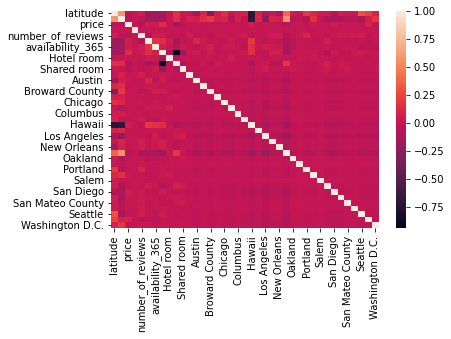

In [10]:
sns.heatmap(ohe_df.corr())

In [11]:
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [12]:
import tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [13]:
ohe_df = ohe_df.drop(["city", "room_type"], axis = 1)
target = "price"
X = ohe_df.drop(target, axis = 1)
y = ohe_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
scaler_x.fit(X_train)
X_train_scaled = scaler_x.transform(X_train)

In [14]:
X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169522 entries, 223342 to 179350
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   latitude                        169522 non-null  float64
 1   longitude                       169522 non-null  float64
 2   minimum_nights                  169522 non-null  int64  
 3   number_of_reviews               169522 non-null  int64  
 4   calculated_host_listings_count  169522 non-null  int64  
 5   availability_365                169522 non-null  int64  
 6   Entire home/apt                 169522 non-null  uint8  
 7   Hotel room                      169522 non-null  uint8  
 8   Private room                    169522 non-null  uint8  
 9   Shared room                     169522 non-null  uint8  
 10  Asheville                       169522 non-null  uint8  
 11  Austin                          169522 non-null  uint8  
 12  Boston     

In [15]:
input_neurons = 9
hl_neurons = 169522 * 10
# initialize model
model = Sequential()
# input layer
model.add(Dense(input_neurons, input_dim = 9, activation = "relu"))
# hidden layer
model.add(Dense(hl_neurons, activation = "relu"))
# output layer
model.add(Dense(1, activation = "linear"))

In [16]:
# compile the model
model.compile(loss = "mse", optimizer = "adam",
              metrics = ["mse", "mae"])
# fit it
hist = model.fit(X_train, y_train, epochs = 1,
                 validation_split = 0.2)

4239/4239 [==============================] - 1124s 265ms/step - loss: 2282940160.0000 - mse: 2282940160.0000 - mae: 304.9030 - val_loss: 329687.9688 - val_mse: 329687.9688 - val_mae: 172.1742
